In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from environnement.atmosphere import AtmosphereISA

1433.6217152826168
Altitutde apogée :  30000.1098258777  m
Temps de descente :  47.698666666934145  minutes
Vitesse d'atterrissage :  -5.776915226557338  m/s


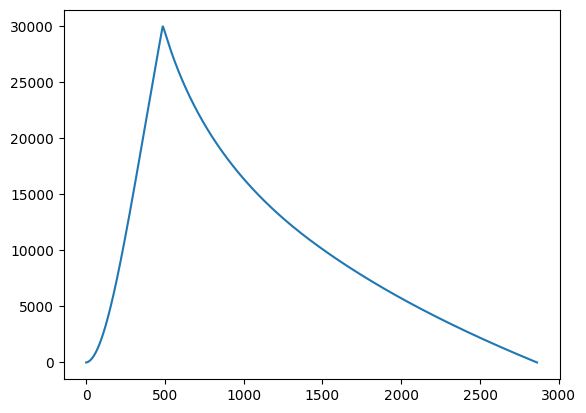

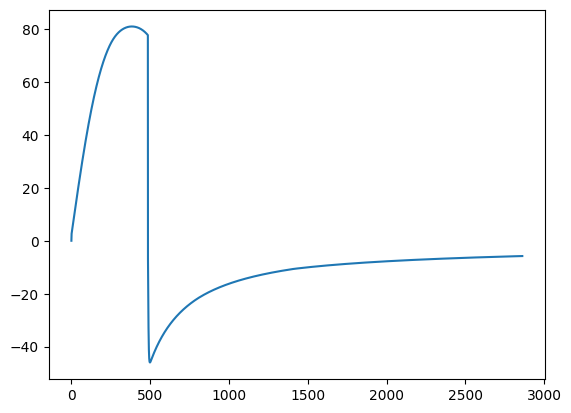

In [4]:
atm = AtmosphereISA()
# Constantes
g = 9.81

# Liste de stockage des données et valeurs initiales
alt = [0]
v = [0]
t = [0]

# Paramètre de la boite
M = 2.5

# Paramètre du balon 
V_ballon_0 = 4.2 
V_ballon_ecl = 4*np.pi*(9.7/2)**3
alt_ecl = 30000
M_ballon = 1.2
S_ballon = 4
Cx_ballon = 1

# Paramètres du parachute
S_para = 1.2
Cx_para = 1

# Paramètre de la simulation
step = 0.01

while alt[-1] < 30000 and t[-1] < 4000:
    t.append(t[-1] + step)

    # Calul du volume du ballon, modèle à revoir
    V_ballon = V_ballon_0 + (V_ballon_ecl - V_ballon_0) * (atm.get_pressure(0) - atm.get_pressure(alt[-1])) / (atm.get_pressure(0) - atm.get_pressure(alt_ecl))
    F_archi = atm.get_density(alt[-1]) * V_ballon * g

    F_frott = 0.5 * atm.get_density(alt[-1]) * Cx_ballon * S_ballon * (v[-1])**2    

    a = (F_archi-F_frott)/(M + M_ballon) - g
    v.append(v[-1] + a*step)

    alt.append(alt[-1] + v[-1]*step)

print(V_ballon)
print("Altitutde apogée : ", alt[-1], " m")
v[-1] = 0
while alt[-1] > 0:
    t.append(t[-1] + step)
    
    F_par = 0.5 * atm.get_density(alt[-1])*Cx_para*S_para*(v[-1])**2
    
    a = -g + F_par/M
    v.append(v[-1] + a*step)

    alt.append(alt[-1] + v[-1]*step)

print("Temps de descente : ", t[-1]/60, " minutes")
print("Vitesse d'atterrissage : ", v[-1], " m/s")

plt.plot(t, alt)
plt.show()

plt.plot(t, v)
plt.show()